Use DT as a classifier algorithm using sckitlearn library. The dataset is called vertebrate. It has 5 categories :
1. mammals
2. birds
3. fishes
4. amphibian
5. reptiles

The attributes are (predictor variables) are the ones used to classify the vertebrate. The data is encoded using the hot encode binary.

male/female => 1 or 0


In [ ]:
import pandas as pd


In [ ]:
myData = pd.read_csv('/content/vertebrate.csv', header='infer');

myData.head(5)

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians


In [ ]:
myData.describe()

,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.466667,0.400000,0.533333,0.133333,0.666667,0.333333
std,0.516398,0.507093,0.516398,0.351866,0.487950,0.487950
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The dataset pressent has limited training examples. We convert it to a binary classification problem(mammals vs non mammals). We replace the class labels of the instances to non mammals except for all non mamals.

In [ ]:
myData['Class'] = myData['Class'].replace(['fishes','birds','amphibians', 'reptiles'], 'non-mammals')

In [ ]:
myData

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,non-mammals
2,salmon,0,0,1,0,0,0,non-mammals
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,non-mammals
5,komodo,0,0,0,0,1,0,non-mammals
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,non-mammals
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,non-mammals


This is now a binary classification problem. We can use pandas to create a cross-tabulation to examine the relationship between features. Get the relationship between warm blooded

In [ ]:
pd.crosstab([myData['Warm-blooded'], myData['Gives Birth'],myData['Aquatic Creature']], myData['Class'])

Class                                      mammals  non-mammals
Warm-blooded Gives Birth Aquatic Creature                      
0            0           0                       0            2
                         1                       0            5
             1           1                       0            1
1            0           0                       0            1
                         1                       0            1
             1           0                       4            0
                         1                       1            0

From the table above it is possible for us to distinguish mammals from non mammals using those two attributes alone. We can also say thata mammal is a vertebrate that is warm blooded and gives birth. Such a relationship can be derived using the decision tree classifier.

#THE DECISION TREE CLASSIFIER

In [ ]:
myData.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Name,human,python,salmon,whale,frog,komodo,bat,pigeon,cat,leopard shark,turtle,penguin,porcupine,eel,salamander
Warm-blooded,1,0,0,1,0,0,1,1,1,0,0,1,1,0,0
Gives Birth,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0
Aquatic Creature,0,0,1,1,1,0,0,0,0,1,1,1,0,1,1
Aerial Creature,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
Has Legs,1,0,0,0,1,1,1,1,1,0,1,1,1,0,1
Hibernates,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1
Class,mammals,non-mammals,non-mammals,mammals,non-mammals,non-mammals,mammals,non-mammals,mammals,non-mammals,non-mammals,non-mammals,mammals,non-mammals,non-mammals


We now apply the decision tree to the dataset.

In [ ]:
from sklearn import tree


In [ ]:
# our y is the class - the dependent var

y = myData['Class']
y

0         mammals
1     non-mammals
2     non-mammals
3         mammals
4     non-mammals
5     non-mammals
6         mammals
7     non-mammals
8         mammals
9     non-mammals
10    non-mammals
11    non-mammals
12        mammals
13    non-mammals
14    non-mammals
Name: Class, dtype: object

In [ ]:
x = myData.drop(['Name','Class'], axis=1)
x

,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates
0,1,1,0,0,1,0
1,0,0,0,0,0,1
2,0,0,1,0,0,0
3,1,1,1,0,0,0
4,0,0,1,0,1,1
5,0,0,0,0,1,0
6,1,1,0,1,1,1
7,1,0,0,1,1,0
8,1,1,0,0,1,0
9,0,1,1,0,0,0


In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
clf =clf.fit(x,y)

In [ ]:
import pydotplus

In [ ]:
from IPython.display import Image

In [ ]:
dot_data = tree.export_graphviz(clf, feature_names=x.columns, class_names=['mammals', 'non-mammals'], filled=True, out_file=None)

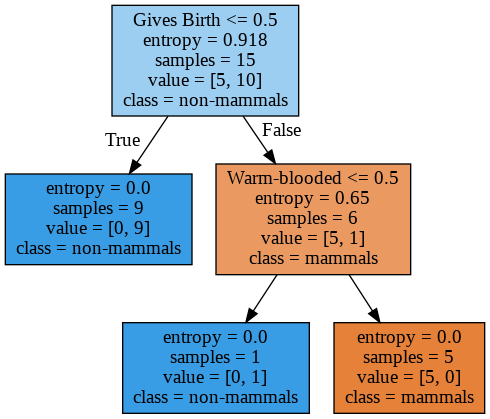

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

#Using testing data
